In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("=" * 60)
print("US 10-Year Treasury Yield vs Gold Prices Analysis")
print("Time Period: 2004 - 2025 (20+ years)")
print("=" * 60)

US 10-Year Treasury Yield vs Gold Prices Analysis
Time Period: 2004 - 2025 (20+ years)


In [4]:
# ============================================================================
# PART 1: DATA COLLECTION (WITH SMART LOADING)
# ============================================================================

# Define time period
start_date = '2004-11-01'
end_date = '2025-10-30'
data_file = 'gold_vs_us10y_data.csv'

# Check if data file already exists
if os.path.exists(data_file):
    print(f"\n✓ Data file found: '{data_file}'")
    print("Loading existing data instead of re-downloading...")
    
    # Load the existing data
    df = pd.read_csv(data_file, index_col=0)
    df.index = pd.to_datetime(df.index)  # Explicitly convert index to datetime
    
    print(f"✓ Data loaded successfully: {len(df)} observations")
    print(f"  Date range: {df.index.min().date()} to {df.index.max().date()}")
    print("\n  [TIP: Delete the CSV file if you want to download fresh data]")
    
else:
    print(f"\nData file not found. Downloading from Yahoo Finance...")
    
    print(f"\n[1/4] Fetching Gold Price Data from Yahoo Finance...")
    print(f"Using GC=F (Gold Futures)")

    # Fetch Gold prices (Gold Futures)
    gold = yf.download('GC=F', start=start_date, end=end_date, progress=False)
    gold_prices = gold[['Close']].copy()
    gold_prices.columns = ['Gold_Price']

    print(f"✓ Gold data collected: {len(gold_prices)} observations")
    print(f"  Date range: {gold_prices.index.min().date()} to {gold_prices.index.max().date()}")

    print(f"\n[2/4] Fetching US 10-Year Treasury Yield Data...")
    print(f"Using ^TNX (10-Year Treasury Yield Index)")

    # Fetch US 10-Year Treasury Yield
    treasury = yf.download('^TNX', start=start_date, end=end_date, progress=False)
    treasury_yield = treasury[['Close']].copy()
    treasury_yield.columns = ['US10Y_Yield']

    print(f"✓ Treasury yield data collected: {len(treasury_yield)} observations")
    print(f"  Date range: {treasury_yield.index.min().date()} to {treasury_yield.index.max().date()}")


Data file not found. Downloading from Yahoo Finance...

[1/4] Fetching Gold Price Data from Yahoo Finance...
Using GC=F (Gold Futures)
✓ Gold data collected: 5276 observations
  Date range: 2004-11-01 to 2025-10-29

[2/4] Fetching US 10-Year Treasury Yield Data...
Using ^TNX (10-Year Treasury Yield Index)
✓ Treasury yield data collected: 5278 observations
  Date range: 2004-11-01 to 2025-10-29


In [5]:

# ============================================================================
# PART 2: DATA CLEANING & MERGING
# ============================================================================

print(f"\n[3/4] Merging and cleaning data...")

# Merge datasets
df = pd.merge(gold_prices, treasury_yield, left_index=True, right_index=True, how='inner')

# Check for missing values before handling
missing_before = df.isnull().sum()
print(f"\nMissing values before cleaning:")
print(missing_before)

# Handle missing values (forward fill for small gaps)
df = df.fillna(method='ffill').fillna(method='bfill')

# Remove any remaining NaN rows
df = df.dropna()

print(f"\n✓ Data merged and cleaned: {len(df)} observations")
print(f"  Final date range: {df.index.min().date()} to {df.index.max().date()}")



[3/4] Merging and cleaning data...

Missing values before cleaning:
Gold_Price     0
US10Y_Yield    0
dtype: int64

✓ Data merged and cleaned: 5268 observations
  Final date range: 2004-11-01 to 2025-10-29


In [6]:
# ============================================================================
# PART 3: BASIC STATISTICS
# ============================================================================

print(f"\n[4/4] Computing summary statistics...")

print("\n" + "=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
print(df.describe())

# Calculate correlation
correlation = df['Gold_Price'].corr(df['US10Y_Yield'])
print(f"\n{'=' * 60}")
print(f"Overall Correlation (Pearson): {correlation:.4f}")
print(f"{'=' * 60}")

print("\n" + "=" * 60)
print("DATA LOADING COMPLETE!")
print("=" * 60)


[4/4] Computing summary statistics...

SUMMARY STATISTICS
        Gold_Price  US10Y_Yield
count  5268.000000  5268.000000
mean   1409.517501     2.963101
std     613.241188     1.136368
min     412.600006     0.499000
25%    1091.500000     2.035750
50%    1305.950012     2.842000
75%    1745.925018     3.992000
max    4336.399902     5.248000

Overall Correlation (Pearson): -0.1507

DATA LOADING COMPLETE!



VISUALIZING TIME SERIES DATA


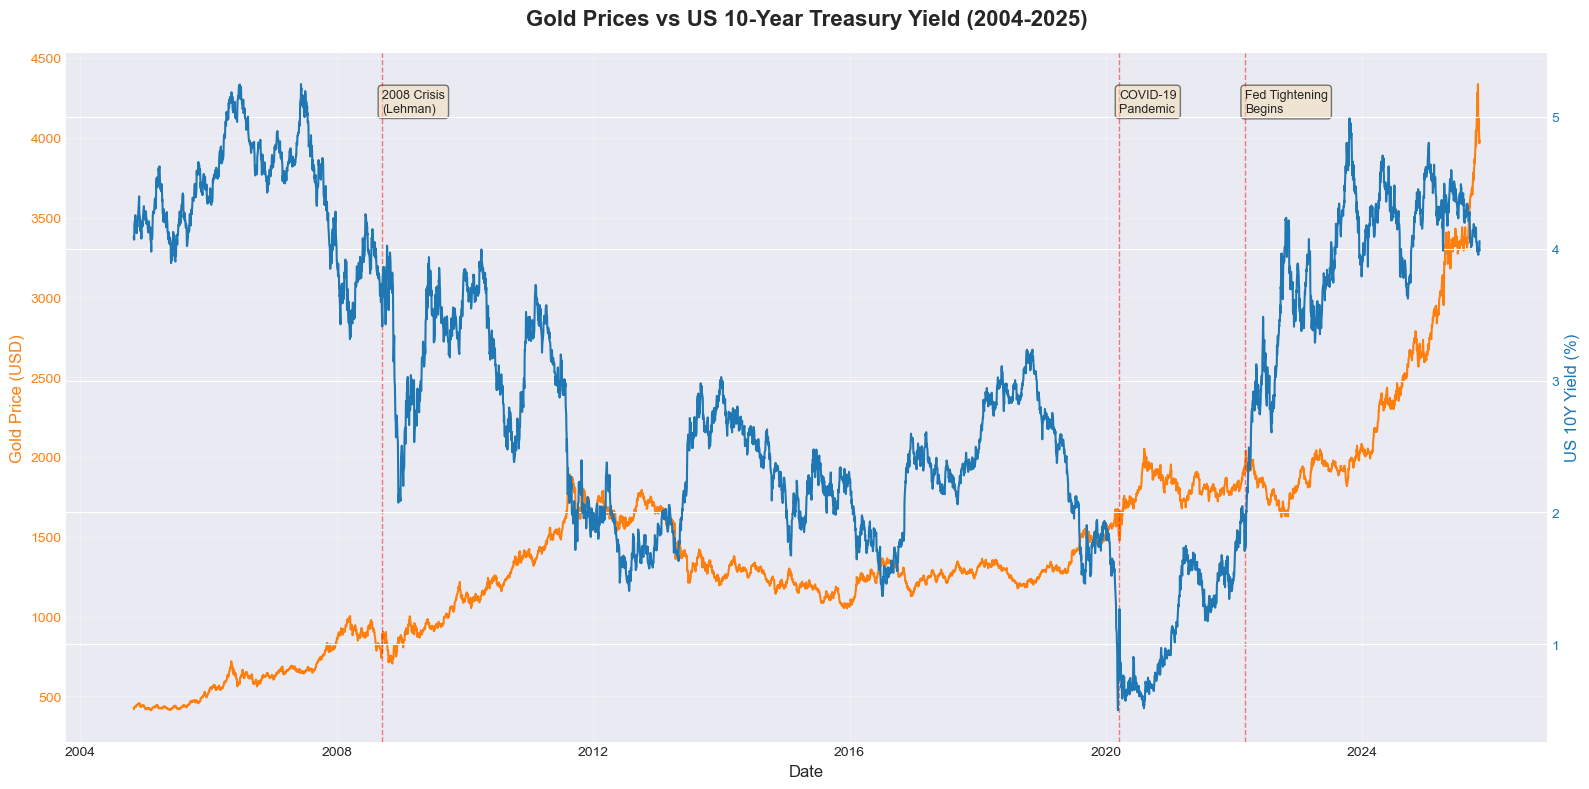

✓ Time series plot saved as 'gold_vs_yield_timeseries.png'


In [7]:
# ============================================================================
# PART 4: TIME SERIES VISUALIZATION
# ============================================================================

print("\n" + "=" * 60)
print("VISUALIZING TIME SERIES DATA")
print("=" * 60)

# Create a figure with dual-axis plot
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot Gold prices on left axis
color = 'tab:orange'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Gold Price (USD)', color=color, fontsize=12)
ax1.plot(df.index, df['Gold_Price'], color=color, linewidth=1.5, label='Gold Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)
# Create second y-axis for Treasury Yield
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('US 10Y Yield (%)', color=color, fontsize=12)
ax2.plot(df.index, df['US10Y_Yield'], color=color, linewidth=1.5, label='US 10Y Yield')
ax2.tick_params(axis='y', labelcolor=color)

# Add major events annotations
events = {
    '2008-09-15': '2008 Crisis\n(Lehman)',
    '2020-03-15': 'COVID-19\nPandemic',
    '2022-03-01': 'Fed Tightening\nBegins',
}

for date, label in events.items():
    ax1.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.5, linewidth=1)
    ax1.text(pd.to_datetime(date), ax1.get_ylim()[1]*0.95, label, 
             rotation=0, fontsize=9, ha='left', va='top', 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.title('Gold Prices vs US 10-Year Treasury Yield (2004-2025)', fontsize=16, fontweight='bold', pad=20)
fig.tight_layout()
plt.savefig('gold_vs_yield_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Time series plot saved as 'gold_vs_yield_timeseries.png'")


SCATTER PLOT & REGRESSION ANALYSIS

DataFrame shape: (5268, 2)
Columns: ['Gold_Price', 'US10Y_Yield']

First few rows:
            Gold_Price  US10Y_Yield
Date                               
2004-11-01  427.299988        4.090
2004-11-02  420.000000        4.075
2004-11-03  424.600006        4.070
2004-11-04  430.100006        4.068
2004-11-05  433.600006        4.186

Data types:
Gold_Price     float64
US10Y_Yield    float64
dtype: object

Null values:
Gold_Price     0
US10Y_Yield    0
dtype: int64

Non-null counts:
  Gold_Price: 5268
  US10Y_Yield: 5268

After dropping NaN: 5268 observations


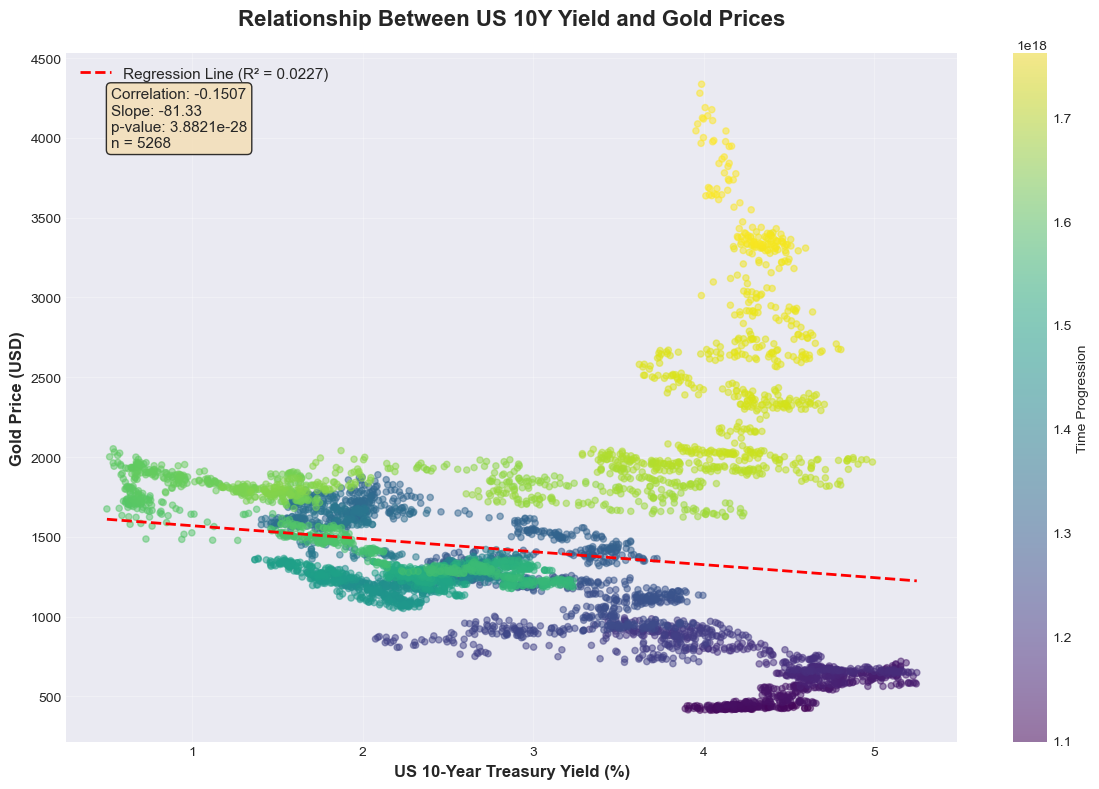

✓ Scatter plot saved as 'gold_vs_yield_scatter.png'

Regression Statistics:
  Slope: -81.3278
  Intercept: 1650.5000
  R-squared: 0.0227
  P-value: 3.8821e-28


In [8]:
# ============================================================================
# PART 5: SCATTER PLOT ANALYSIS
# ============================================================================

print("\n" + "=" * 60)
print("SCATTER PLOT & REGRESSION ANALYSIS")
print("=" * 60)

# Safety check: Make sure df exists and has data
try:
    print(f"\nDataFrame shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"\nFirst few rows:")
    print(df.head())
    print(f"\nData types:")
    print(df.dtypes)
    print(f"\nNull values:")
    print(df.isnull().sum())
    print(f"\nNon-null counts:")
    print(f"  Gold_Price: {df['Gold_Price'].notna().sum()}")
    print(f"  US10Y_Yield: {df['US10Y_Yield'].notna().sum()}")
    
    if len(df) == 0:
        print("\nERROR: DataFrame is empty. Please run Part 1 first to load data.")
        raise ValueError("DataFrame is empty")
    
    # Drop any NaN values before regression
    df_clean = df.dropna()
    print(f"\nAfter dropping NaN: {len(df_clean)} observations")
    
    if len(df_clean) == 0:
        print("\nERROR: All data is NaN. Check data loading in Part 1.")
        raise ValueError("All data contains NaN values")
        
except NameError:
    print("ERROR: DataFrame 'df' not found. Please run Part 1 first to load data.")
    raise NameError("Run Part 1 to load the data before running this cell")

from scipy import stats

# Create scatter plot using cleaned data
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot
scatter = ax.scatter(df_clean['US10Y_Yield'], df_clean['Gold_Price'], 
                     alpha=0.5, s=20, c=df_clean.index.astype(np.int64), 
                     cmap='viridis')

# Add regression line using cleaned data
slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['US10Y_Yield'], df_clean['Gold_Price'])
line_x = np.array([df_clean['US10Y_Yield'].min(), df_clean['US10Y_Yield'].max()])
line_y = slope * line_x + intercept
ax.plot(line_x, line_y, 'r--', linewidth=2, label=f'Regression Line (R² = {r_value**2:.4f})')

# Labels and formatting
ax.set_xlabel('US 10-Year Treasury Yield (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Gold Price (USD)', fontsize=12, fontweight='bold')
ax.set_title('Relationship Between US 10Y Yield and Gold Prices', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Add colorbar to show time progression
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Time Progression', fontsize=10)

# Add statistics text box
textstr = f'Correlation: {correlation:.4f}\nSlope: {slope:.2f}\np-value: {p_value:.4e}\nn = {len(df_clean)}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.savefig('gold_vs_yield_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Scatter plot saved as 'gold_vs_yield_scatter.png'")
print(f"\nRegression Statistics:")
print(f"  Slope: {slope:.4f}")
print(f"  Intercept: {intercept:.4f}")
print(f"  R-squared: {r_value**2:.4f}")
print(f"  P-value: {p_value:.4e}")








DISTRIBUTION ANALYSIS


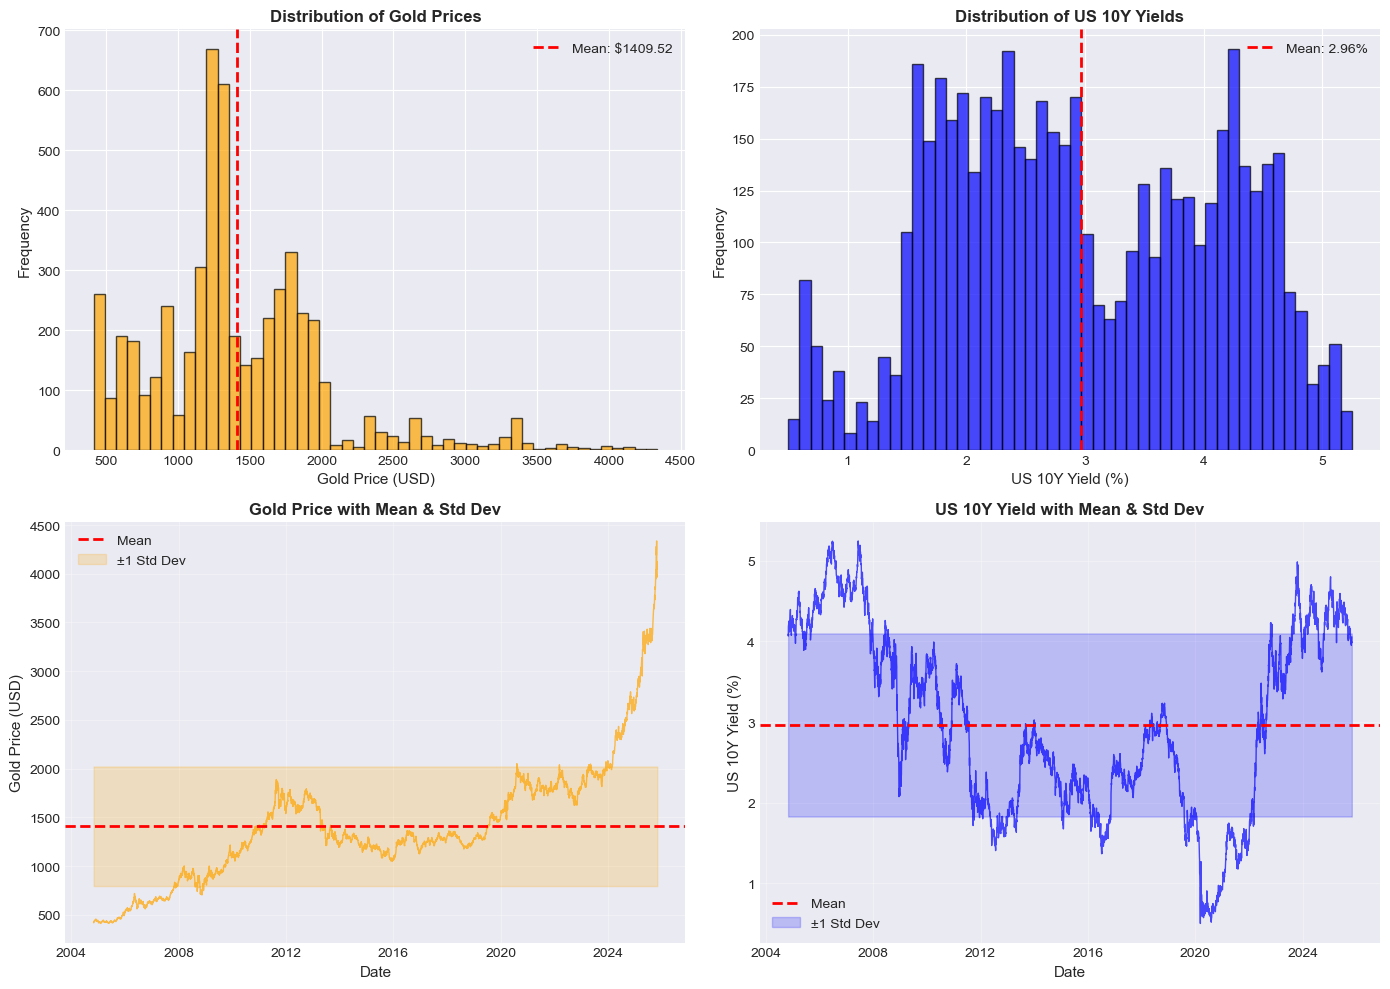

✓ Distribution plots saved as 'distributions_analysis.png'


In [9]:
# ============================================================================
# PART 6: DISTRIBUTION ANALYSIS
# ============================================================================

print("\n" + "=" * 60)
print("DISTRIBUTION ANALYSIS")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gold price distribution
axes[0, 0].hist(df['Gold_Price'], bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Gold Price (USD)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Gold Prices', fontsize=12, fontweight='bold')
axes[0, 0].axvline(df['Gold_Price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["Gold_Price"].mean():.2f}')
axes[0, 0].legend()

# Treasury yield distribution
axes[0, 1].hist(df['US10Y_Yield'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('US 10Y Yield (%)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Distribution of US 10Y Yields', fontsize=12, fontweight='bold')
axes[0, 1].axvline(df['US10Y_Yield'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["US10Y_Yield"].mean():.2f}%')
axes[0, 1].legend()

# Gold price over time with mean
axes[1, 0].plot(df.index, df['Gold_Price'], color='orange', alpha=0.7, linewidth=1)
axes[1, 0].axhline(df['Gold_Price'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1, 0].fill_between(df.index, df['Gold_Price'].mean() - df['Gold_Price'].std(), 
                         df['Gold_Price'].mean() + df['Gold_Price'].std(), 
                         color='orange', alpha=0.2, label='±1 Std Dev')
axes[1, 0].set_xlabel('Date', fontsize=11)
axes[1, 0].set_ylabel('Gold Price (USD)', fontsize=11)
axes[1, 0].set_title('Gold Price with Mean & Std Dev', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Treasury yield over time with mean
axes[1, 1].plot(df.index, df['US10Y_Yield'], color='blue', alpha=0.7, linewidth=1)
axes[1, 1].axhline(df['US10Y_Yield'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1, 1].fill_between(df.index, df['US10Y_Yield'].mean() - df['US10Y_Yield'].std(), 
                         df['US10Y_Yield'].mean() + df['US10Y_Yield'].std(), 
                         color='blue', alpha=0.2, label='±1 Std Dev')
axes[1, 1].set_xlabel('Date', fontsize=11)
axes[1, 1].set_ylabel('US 10Y Yield (%)', fontsize=11)
axes[1, 1].set_title('US 10Y Yield with Mean & Std Dev', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('distributions_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Distribution plots saved as 'distributions_analysis.png'")


ROLLING CORRELATION ANALYSIS


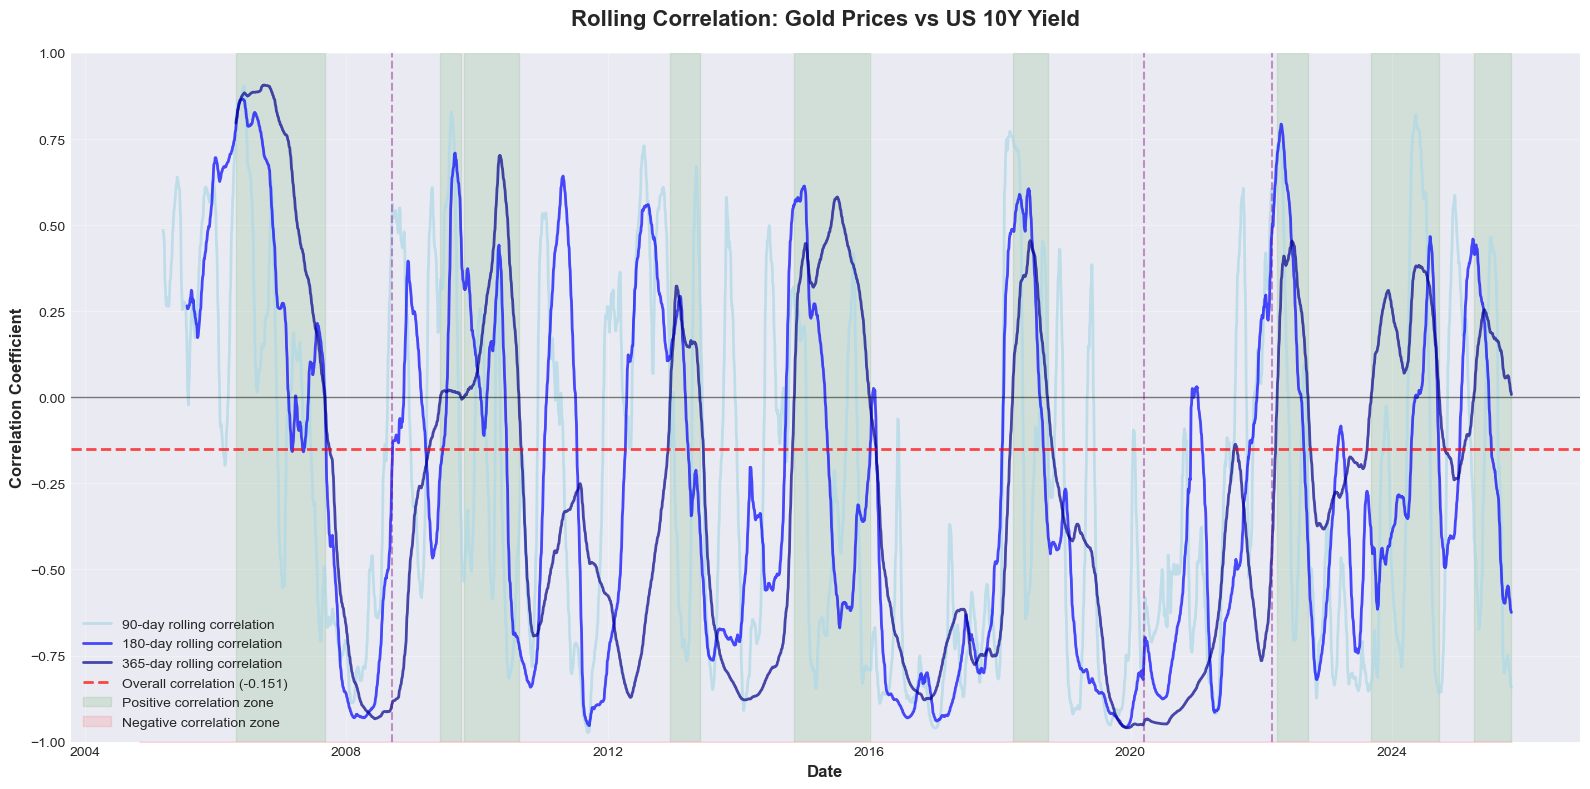

✓ Rolling correlation plot saved as 'rolling_correlation.png'

Key Observations:
  Max 1-year correlation: 0.9067 on 2006-09-28
  Min 1-year correlation: -0.9601 on 2019-12-17
  Latest 1-year correlation: 0.0077


In [10]:
# ============================================================================
# PART 7: ROLLING CORRELATION ANALYSIS
# ============================================================================

print("\n" + "=" * 60)
print("ROLLING CORRELATION ANALYSIS")
print("=" * 60)

# Calculate rolling correlations with different windows
windows = [90, 180, 365]  # 3 months, 6 months, 1 year
colors = ['lightblue', 'blue', 'darkblue']

fig, ax = plt.subplots(figsize=(16, 8))

for window, color in zip(windows, colors):
    rolling_corr = df['Gold_Price'].rolling(window=window).corr(df['US10Y_Yield'])
    ax.plot(df.index, rolling_corr, label=f'{window}-day rolling correlation', 
            linewidth=2, color=color, alpha=0.7)

# Add horizontal reference lines
ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
ax.axhline(y=correlation, color='red', linestyle='--', linewidth=2, 
           label=f'Overall correlation ({correlation:.3f})', alpha=0.7)

# Add shaded regions for positive/negative correlation
ax.fill_between(df.index, 0, 1, where=(rolling_corr > 0), alpha=0.1, 
                color='green', transform=ax.get_xaxis_transform(), label='Positive correlation zone')
ax.fill_between(df.index, -1, 0, alpha=0.1, color='red', 
                transform=ax.get_xaxis_transform(), label='Negative correlation zone')

# Add major events
events = {
    '2008-09-15': '2008 Crisis',
    '2020-03-15': 'COVID-19',
    '2022-03-01': 'Fed Tightening',
}

for date, label in events.items():
    ax.axvline(pd.to_datetime(date), color='purple', linestyle='--', alpha=0.4, linewidth=1.5)

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Correlation Coefficient', fontsize=12, fontweight='bold')
ax.set_title('Rolling Correlation: Gold Prices vs US 10Y Yield', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_ylim(-1, 1)

plt.tight_layout()
plt.savefig('rolling_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Rolling correlation plot saved as 'rolling_correlation.png'")

# Print key insights about correlation changes
print("\nKey Observations:")
rolling_365 = df['Gold_Price'].rolling(window=365).corr(df['US10Y_Yield'])
print(f"  Max 1-year correlation: {rolling_365.max():.4f} on {rolling_365.idxmax().date()}")
print(f"  Min 1-year correlation: {rolling_365.min():.4f} on {rolling_365.idxmin().date()}")
print(f"  Latest 1-year correlation: {rolling_365.iloc[-1]:.4f}")


PERIOD-BASED COMPARISON

              Period  Correlation  Gold Mean ($)  Gold Std ($)  Yield Mean (%)  Yield Std (%)  Observations
     Pre-2008 Crisis    -0.335601     635.021599    163.907193        4.410712       0.422823           963
     2008 Crisis Era    -0.158907    1061.677202    177.846353        3.232318       0.462740           579
Post-Crisis Recovery    -0.308753    1360.176338    181.079770        2.306884       0.486388          2261
           COVID Era    -0.325435    1785.392275    105.441842        1.161438       0.395780           505
      Fed Tightening     0.453001    2314.707809    600.440335        3.841871       0.705914           960


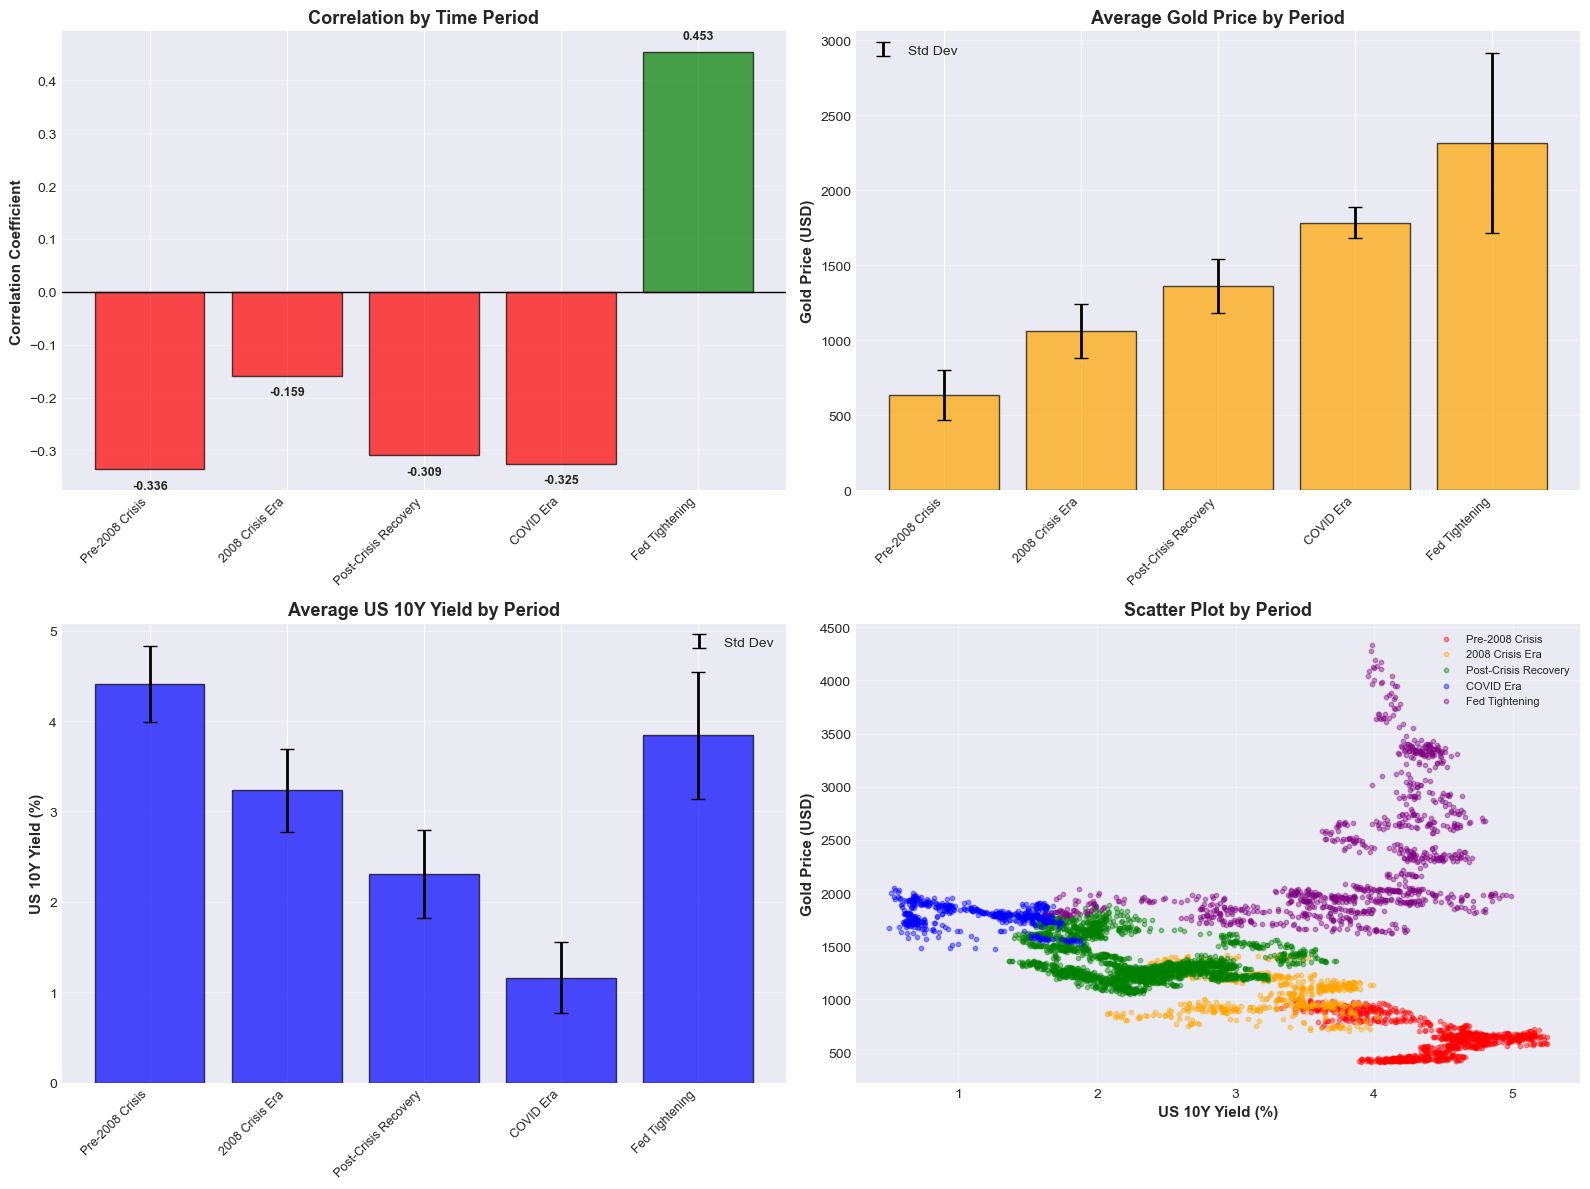


✓ Period comparison plots saved as 'period_comparison.png'


In [11]:
# ============================================================================
# PART 8: PERIOD-BASED ANALYSIS
# ============================================================================

print("\n" + "=" * 60)
print("PERIOD-BASED COMPARISON")
print("=" * 60)

# Define analysis periods
periods = {
    'Pre-2008 Crisis': ('2004-11-01', '2008-09-14'),
    '2008 Crisis Era': ('2008-09-15', '2010-12-31'),
    'Post-Crisis Recovery': ('2011-01-01', '2019-12-31'),
    'COVID Era': ('2020-01-01', '2021-12-31'),
    'Fed Tightening': ('2022-01-01', '2025-10-30'),
}

# Calculate statistics for each period
period_stats = []

for period_name, (start, end) in periods.items():
    period_df = df.loc[start:end]
    
    if len(period_df) > 0:
        corr = period_df['Gold_Price'].corr(period_df['US10Y_Yield'])
        gold_mean = period_df['Gold_Price'].mean()
        gold_std = period_df['Gold_Price'].std()
        yield_mean = period_df['US10Y_Yield'].mean()
        yield_std = period_df['US10Y_Yield'].std()
        
        period_stats.append({
            'Period': period_name,
            'Correlation': corr,
            'Gold Mean ($)': gold_mean,
            'Gold Std ($)': gold_std,
            'Yield Mean (%)': yield_mean,
            'Yield Std (%)': yield_std,
            'Observations': len(period_df)
        })

# Create DataFrame for easier viewing
period_df_stats = pd.DataFrame(period_stats)
print("\n" + period_df_stats.to_string(index=False))

# Visualize period comparisons
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Correlation by period
ax1 = axes[0, 0]
bars = ax1.bar(range(len(period_stats)), period_df_stats['Correlation'], 
               color=['green' if x > 0 else 'red' for x in period_df_stats['Correlation']], 
               alpha=0.7, edgecolor='black')
ax1.set_xticks(range(len(period_stats)))
ax1.set_xticklabels(period_df_stats['Period'], rotation=45, ha='right', fontsize=9)
ax1.set_ylabel('Correlation Coefficient', fontsize=11, fontweight='bold')
ax1.set_title('Correlation by Time Period', fontsize=13, fontweight='bold')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, period_df_stats['Correlation'])):
    ax1.text(bar.get_x() + bar.get_width()/2, val + 0.02 if val > 0 else val - 0.02, 
             f'{val:.3f}', ha='center', va='bottom' if val > 0 else 'top', fontsize=9, fontweight='bold')

# 2. Gold price by period
ax2 = axes[0, 1]
ax2.bar(range(len(period_stats)), period_df_stats['Gold Mean ($)'], 
        color='orange', alpha=0.7, edgecolor='black')
ax2.errorbar(range(len(period_stats)), period_df_stats['Gold Mean ($)'], 
             yerr=period_df_stats['Gold Std ($)'], fmt='none', color='black', 
             capsize=5, linewidth=2, label='Std Dev')
ax2.set_xticks(range(len(period_stats)))
ax2.set_xticklabels(period_df_stats['Period'], rotation=45, ha='right', fontsize=9)
ax2.set_ylabel('Gold Price (USD)', fontsize=11, fontweight='bold')
ax2.set_title('Average Gold Price by Period', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# 3. Yield by period
ax3 = axes[1, 0]
ax3.bar(range(len(period_stats)), period_df_stats['Yield Mean (%)'], 
        color='blue', alpha=0.7, edgecolor='black')
ax3.errorbar(range(len(period_stats)), period_df_stats['Yield Mean (%)'], 
             yerr=period_df_stats['Yield Std (%)'], fmt='none', color='black', 
             capsize=5, linewidth=2, label='Std Dev')
ax3.set_xticks(range(len(period_stats)))
ax3.set_xticklabels(period_df_stats['Period'], rotation=45, ha='right', fontsize=9)
ax3.set_ylabel('US 10Y Yield (%)', fontsize=11, fontweight='bold')
ax3.set_title('Average US 10Y Yield by Period', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Scatter plots by period (overlaid)
ax4 = axes[1, 1]
period_colors = ['red', 'orange', 'green', 'blue', 'purple']

for i, (period_name, (start, end)) in enumerate(periods.items()):
    period_data = df.loc[start:end]
    if len(period_data) > 0:
        ax4.scatter(period_data['US10Y_Yield'], period_data['Gold_Price'], 
                   alpha=0.4, s=10, label=period_name, color=period_colors[i])

ax4.set_xlabel('US 10Y Yield (%)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Gold Price (USD)', fontsize=11, fontweight='bold')
ax4.set_title('Scatter Plot by Period', fontsize=13, fontweight='bold')
ax4.legend(fontsize=8, loc='best')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('period_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Period comparison plots saved as 'period_comparison.png'")


              Period  Correlation  Gold Mean ($)  Gold Std ($)  Yield Mean (%)  Yield Std (%)  Observations
     Pre-2008 Crisis    -0.335601     635.021599    163.907193        4.410712       0.422823           963
     2008 Crisis Era    -0.158907    1061.677202    177.846353        3.232318       0.462740           579
Post-Crisis Recovery    -0.308753    1360.176338    181.079770        2.306884       0.486388          2261
           COVID Era    -0.325435    1785.392275    105.441842        1.161438       0.395780           505
      Fed Tightening     0.453001    2314.707809    600.440335        3.841871       0.705914           960


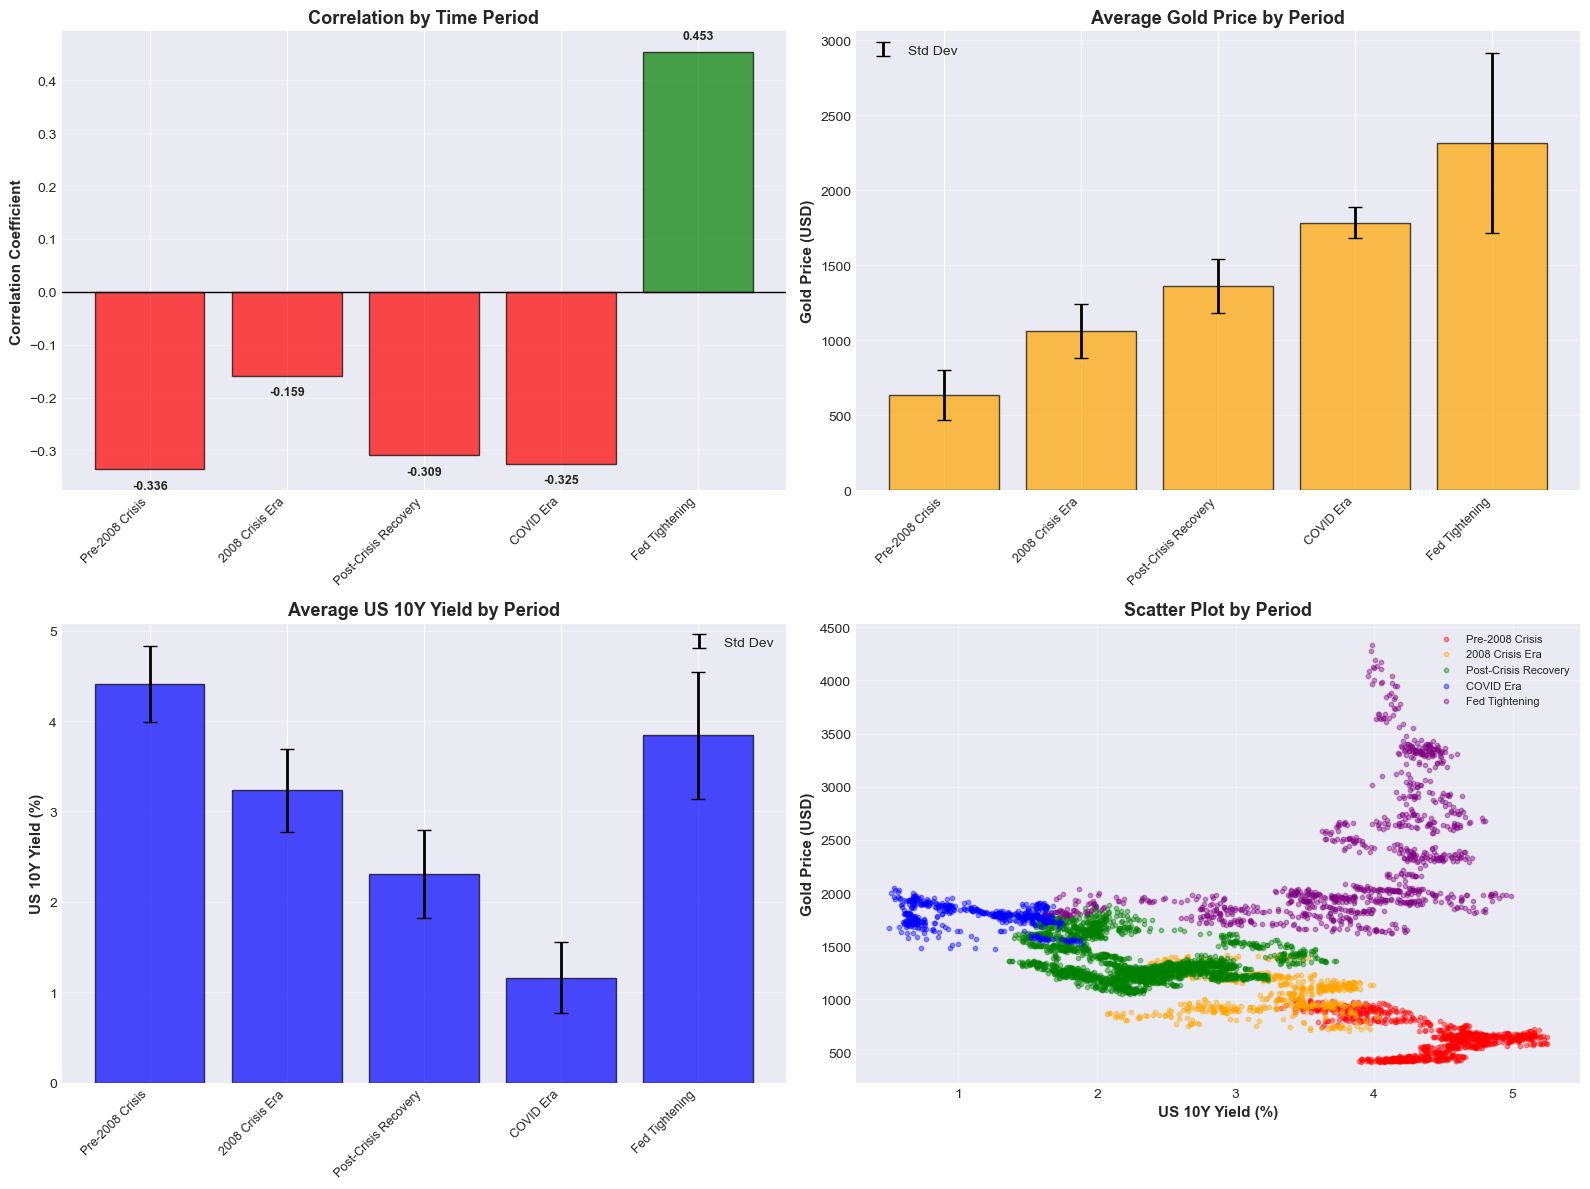


✓ Period comparison plots saved as 'period_comparison.png'


In [12]:
# ============================================================================
# PART 8: PERIOD-BASED ANALYSIS
# ============================================================================

# Define analysis periods
periods = {
    'Pre-2008 Crisis': ('2004-11-01', '2008-09-14'),
    '2008 Crisis Era': ('2008-09-15', '2010-12-31'),
    'Post-Crisis Recovery': ('2011-01-01', '2019-12-31'),
    'COVID Era': ('2020-01-01', '2021-12-31'),
    'Fed Tightening': ('2022-01-01', '2025-10-30'),
}

# Calculate statistics for each period
period_stats = []

for period_name, (start, end) in periods.items():
    period_df = df.loc[start:end]
    
    if len(period_df) > 0:
        corr = period_df['Gold_Price'].corr(period_df['US10Y_Yield'])
        gold_mean = period_df['Gold_Price'].mean()
        gold_std = period_df['Gold_Price'].std()
        yield_mean = period_df['US10Y_Yield'].mean()
        yield_std = period_df['US10Y_Yield'].std()
        
        period_stats.append({
            'Period': period_name,
            'Correlation': corr,
            'Gold Mean ($)': gold_mean,
            'Gold Std ($)': gold_std,
            'Yield Mean (%)': yield_mean,
            'Yield Std (%)': yield_std,
            'Observations': len(period_df)
        })

# Create DataFrame for easier viewing
period_df_stats = pd.DataFrame(period_stats)
print("\n" + period_df_stats.to_string(index=False))

# Visualize period comparisons
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Correlation by period
ax1 = axes[0, 0]
bars = ax1.bar(range(len(period_stats)), period_df_stats['Correlation'], 
               color=['green' if x > 0 else 'red' for x in period_df_stats['Correlation']], 
               alpha=0.7, edgecolor='black')
ax1.set_xticks(range(len(period_stats)))
ax1.set_xticklabels(period_df_stats['Period'], rotation=45, ha='right', fontsize=9)
ax1.set_ylabel('Correlation Coefficient', fontsize=11, fontweight='bold')
ax1.set_title('Correlation by Time Period', fontsize=13, fontweight='bold')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, period_df_stats['Correlation'])):
    ax1.text(bar.get_x() + bar.get_width()/2, val + 0.02 if val > 0 else val - 0.02, 
             f'{val:.3f}', ha='center', va='bottom' if val > 0 else 'top', fontsize=9, fontweight='bold')

# 2. Gold price by period
ax2 = axes[0, 1]
ax2.bar(range(len(period_stats)), period_df_stats['Gold Mean ($)'], 
        color='orange', alpha=0.7, edgecolor='black')
ax2.errorbar(range(len(period_stats)), period_df_stats['Gold Mean ($)'], 
             yerr=period_df_stats['Gold Std ($)'], fmt='none', color='black', 
             capsize=5, linewidth=2, label='Std Dev')
ax2.set_xticks(range(len(period_stats)))
ax2.set_xticklabels(period_df_stats['Period'], rotation=45, ha='right', fontsize=9)
ax2.set_ylabel('Gold Price (USD)', fontsize=11, fontweight='bold')
ax2.set_title('Average Gold Price by Period', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# 3. Yield by period
ax3 = axes[1, 0]
ax3.bar(range(len(period_stats)), period_df_stats['Yield Mean (%)'], 
        color='blue', alpha=0.7, edgecolor='black')
ax3.errorbar(range(len(period_stats)), period_df_stats['Yield Mean (%)'], 
             yerr=period_df_stats['Yield Std (%)'], fmt='none', color='black', 
             capsize=5, linewidth=2, label='Std Dev')
ax3.set_xticks(range(len(period_stats)))
ax3.set_xticklabels(period_df_stats['Period'], rotation=45, ha='right', fontsize=9)
ax3.set_ylabel('US 10Y Yield (%)', fontsize=11, fontweight='bold')
ax3.set_title('Average US 10Y Yield by Period', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Scatter plots by period (overlaid)
ax4 = axes[1, 1]
period_colors = ['red', 'orange', 'green', 'blue', 'purple']

for i, (period_name, (start, end)) in enumerate(periods.items()):
    period_data = df.loc[start:end]
    if len(period_data) > 0:
        ax4.scatter(period_data['US10Y_Yield'], period_data['Gold_Price'], 
                   alpha=0.4, s=10, label=period_name, color=period_colors[i])

ax4.set_xlabel('US 10Y Yield (%)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Gold Price (USD)', fontsize=11, fontweight='bold')
ax4.set_title('Scatter Plot by Period', fontsize=13, fontweight='bold')
ax4.legend(fontsize=8, loc='best')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('period_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Period comparison plots saved as 'period_comparison.png'")
